In [1]:
from matplotlib import pyplot as plt
import glob
import numpy as np

In [2]:
import pandas as pd

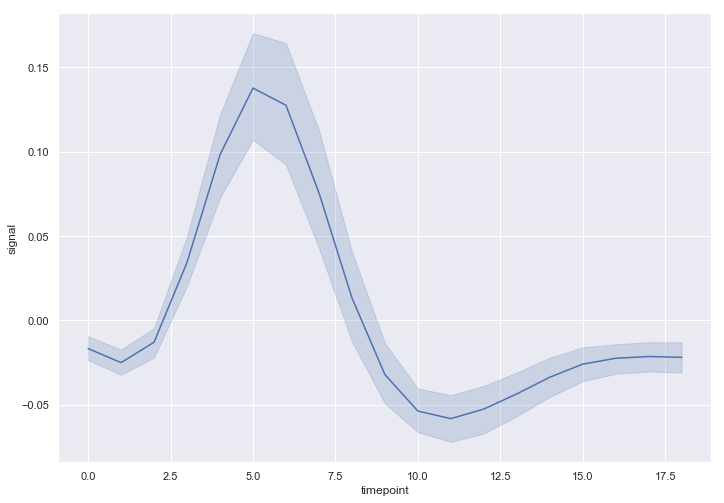

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

import warnings
warnings.filterwarnings("ignore")

In [4]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


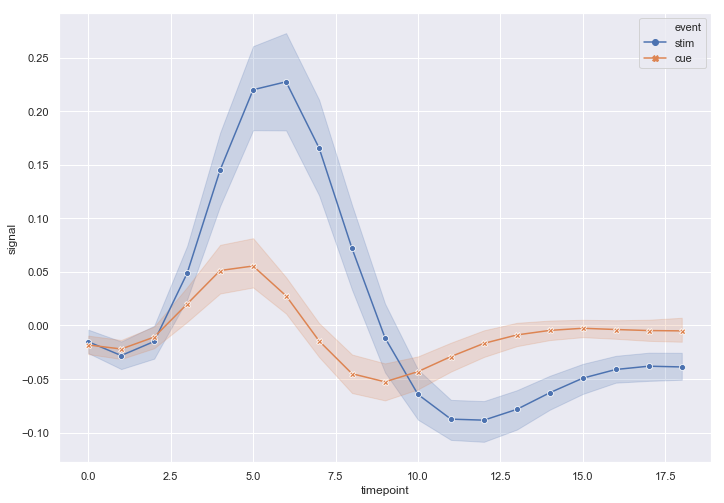

In [5]:
ax = sns.lineplot(x="timepoint", y="signal",
                  hue="event", style="event",
                  markers=True, dashes=False, data=fmri)

In [6]:
def stat(path):
    acc = []
    tacc = []
    for f in glob.glob(path+'*'):
        with open(f) as ff:
            _, train_acc, test_acc = map(float, ff.readline().split(' '))
            acc.append(test_acc)
            tacc.append(train_acc)
    return acc, tacc

In [7]:
a, b = stat("../results/IMDBBINARY/IMDBBINARY_{}".format(0.05))

In [25]:
def df_backward_est(name):
    df = []
    for i in np.linspace(0.05, 0.95, 19):
        noise = str(np.round(i,2)).ljust(4,'0')
        for acc, tacc in zip(*stat("../results/{}/{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'org_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
        for acc, tacc in zip(*stat("../results/{}/estimate_backward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'backward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'backward_train'})
    df = pd.DataFrame(df)
    return df

In [32]:
def df_backward_forward_est(name):
    df = []
    for i in np.linspace(0.05, 0.95, 19):
        noise = str(np.round(i,2)).ljust(4,'0')
        for acc, tacc in zip(*stat("../results/{}/{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'org_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
        for acc, tacc in zip(*stat("../results/{}/estimate_backward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'backward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'backward_train'})
        for acc, tacc in zip(*stat("../results/{}/estimate_forward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'forward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'forward_train'})
    df = pd.DataFrame(df)
    return df

In [35]:
def df_backward_exact(name):
    df = []
    for i in np.linspace(0.05, 0.95, 19):
        noise = str(np.round(i,2)).ljust(4,'0')
        for acc, tacc in zip(*stat("../results/{}/{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'org_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'org_train'})
        for acc, tacc in zip(*stat("../results/{}/exact_backward_{}_{}".format(name, name, noise))):
            df.append({'noise': noise, 'acc': acc, 'data': 'exact_backward_test'})
            df.append({'noise': noise, 'acc': tacc, 'data': 'exact_backward_train'})
    df = pd.DataFrame(df)
    return df

In [26]:
IMDBBINARY_est = df_backward_est("IMDBBINARY")

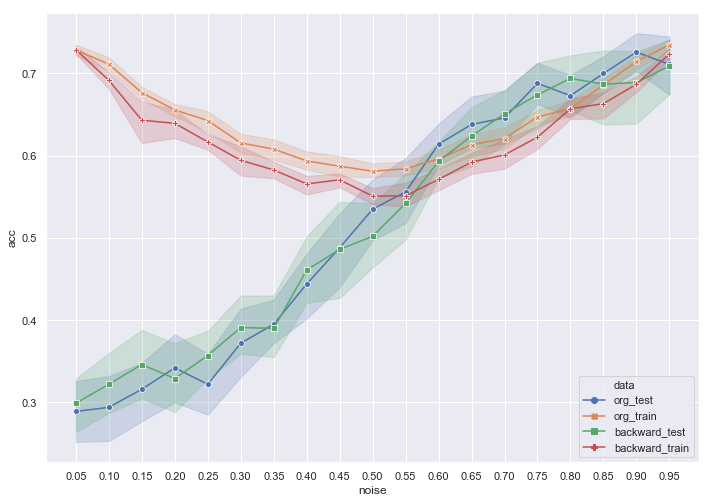

In [27]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=IMDBBINARY_est)

In [28]:
IMDBMULTI_est = df_backward_est("IMDBMULTI")

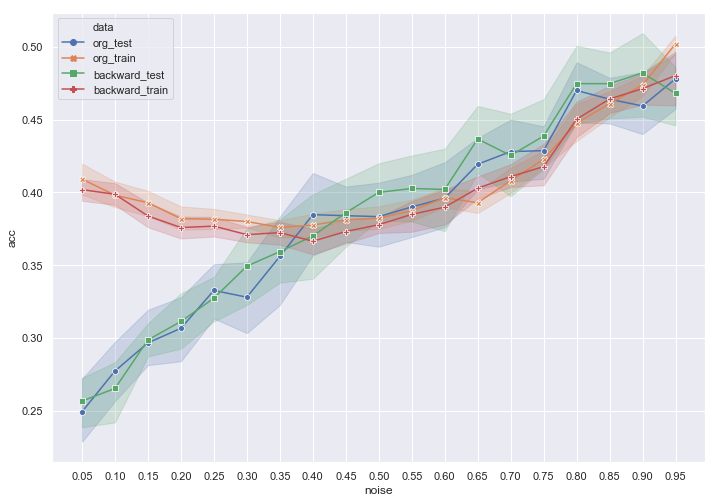

In [31]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=IMDBMULTI_est)

In [33]:
PROTEINS_est = df_backward_forward_est("PROTEINS")

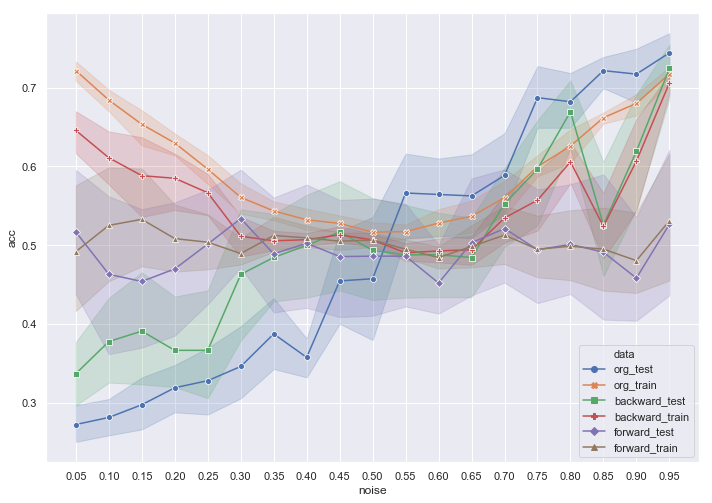

In [34]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=PROTEINS_est)

In [36]:
MUTAG_exact = df_backward_exact("MUTAG")

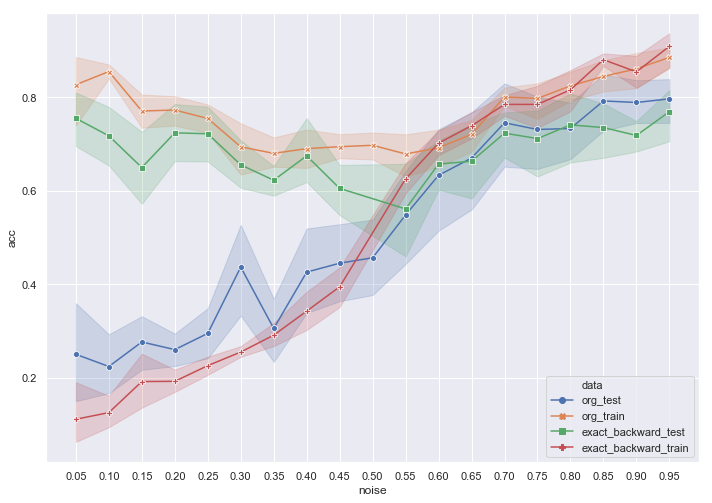

In [37]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=MUTAG_exact)

In [38]:
NCI1_est = df_backward_forward_est("NCI1")

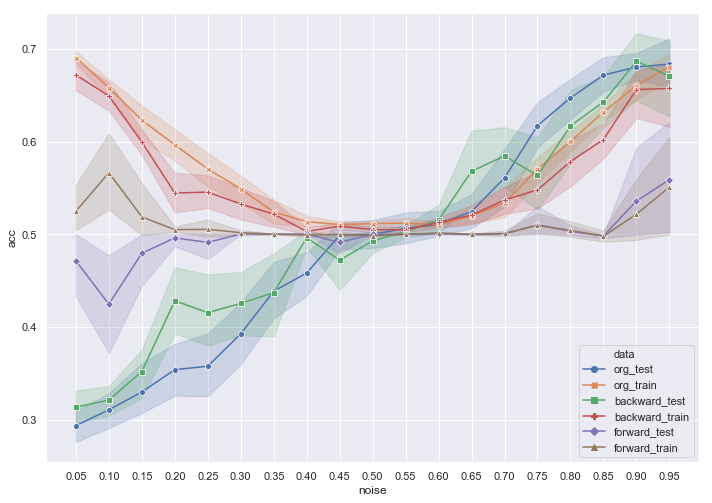

In [39]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=NCI1_est)

In [40]:
PTC_est = df_backward_forward_est("PTC")

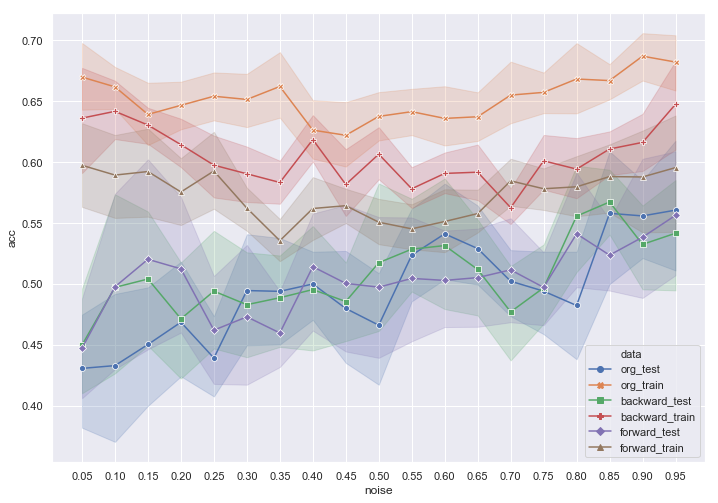

In [41]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=PTC_est)

In [31]:
REDDITBINARY_est = []
for i in np.linspace(0.05, 0.95, 19):
    noise = str(np.round(i,2)).ljust(4,'0')
    for acc in stat("../results/REDDITBINARY/REDDITBINARY_{}".format(noise)):
        REDDITBINARY_est.append({'noise': noise, 'acc': acc, 'data': 'org'})
    for acc in stat("../results/REDDITBINARY/estimate_backward_REDDITBINARY_{}".format(noise)):
        REDDITBINARY_est.append({'noise': noise, 'acc': acc, 'data': 'backward'})
    #for acc in stat("../results/PTC/estimate_forward_REDDITBINARY_{}".format(noise)):
    #    REDDITBINARY_est.append({'noise': noise, 'acc': acc, 'data': 'forward'})
REDDITBINARY_est = pd.DataFrame(REDDITBINARY_est)

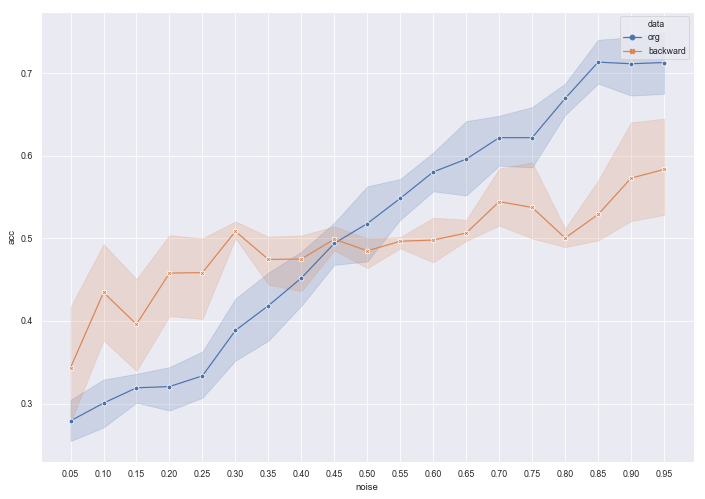

In [56]:
ax = sns.lineplot(x="noise", y="acc",
                  hue="data", style="data",
                  markers=True, dashes=False, data=REDDITBINARY_est)

In [57]:
stat("../results/REDDITBINARY/REDDITBINARY_{}".format(noise))

[0.735, 0.715, 0.605, 0.765, 0.61, 0.69, 0.745, 0.765, 0.775, 0.71]